In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
ratings=pd.read_csv('ml-20m/ratings.csv')
links=pd.read_csv('ml-20m/links.csv')
tags=pd.read_csv('ml-20m/tags.csv')
genome_tags=pd.read_csv('ml-20m/genome-tags.csv')
genome_scores=pd.read_csv('ml-20m/genome-scores.csv')
movies=pd.read_csv('ml-20m/movies.csv')


In [3]:
ratings

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


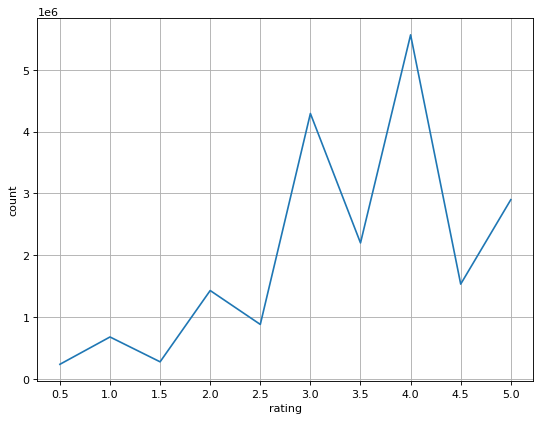

In [4]:
vals=np.asarray(ratings.rating.value_counts().sort_index(inplace=False))
xlabels=ratings.rating.value_counts().sort_index(inplace=False).index

figure(figsize=(8, 6), dpi=80)

plt.grid()
plt.xticks(np.arange(0.5, 5.5, step=0.5))
#plt.legend([])
plt.xlabel('rating')
plt.ylabel('count')
plt.plot(xlabels, vals)

In [5]:
ratings.userId.value_counts()

118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
          ... 
59390       20
23558       20
34668       20
80291       20
58028       20
Name: userId, Length: 138493, dtype: int64

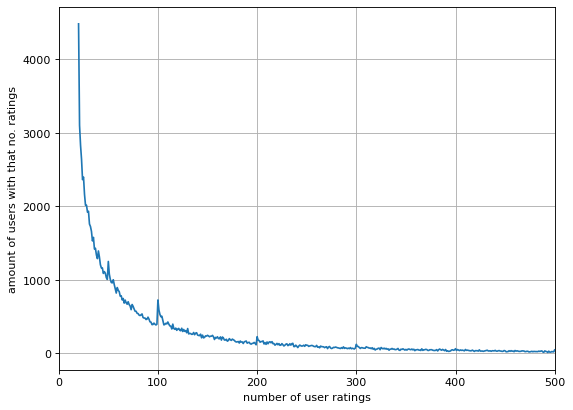

In [6]:
vals, counts= np.unique(np.asarray(ratings.userId.value_counts()), return_counts=True)

figure(figsize=(8, 6), dpi=80)

plt.grid()
#plt.legend([])
plt.xlabel('number of user ratings')
plt.ylabel('amount of users with that no. ratings')
#plt.ylim(0, 20)
plt.xlim(0,500)
plt.plot( vals, counts)

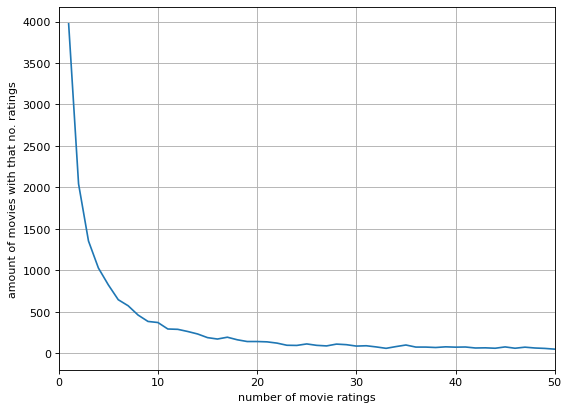

In [7]:
vals, counts= np.unique(np.asarray(ratings.movieId.value_counts()), return_counts=True)

figure(figsize=(8, 6), dpi=80)

plt.grid()
#plt.legend([])
plt.xlabel('number of movie ratings')
plt.ylabel('amount of movies with that no. ratings')
plt.xlim(0, 50)
plt.plot( vals, counts)

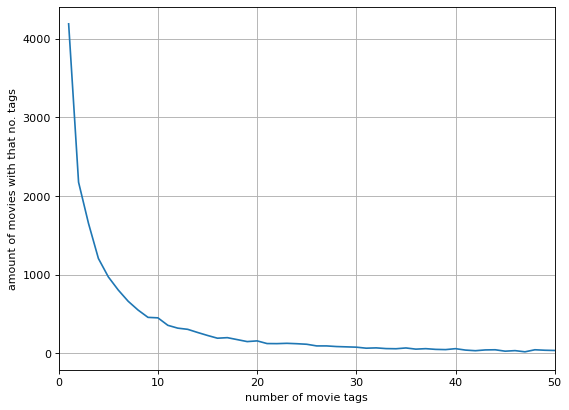

In [8]:
vals, counts= np.unique(np.asarray(tags.movieId.value_counts()), return_counts=True)

figure(figsize=(8, 6), dpi=80)

plt.grid()
#plt.legend([])
plt.xlabel('number of movie tags')
plt.ylabel('amount of movies with that no. tags')
plt.xlim(0, 50)
plt.plot( vals, counts)

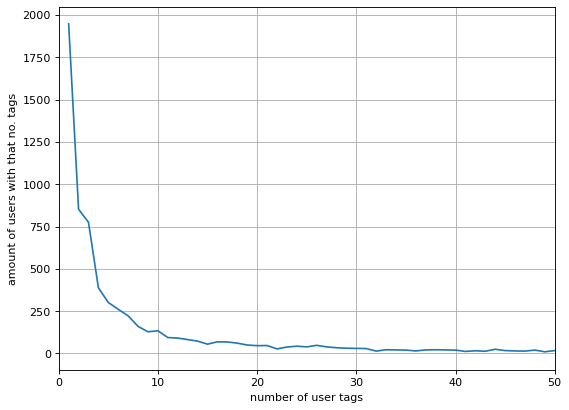

In [9]:
vals, counts= np.unique(np.asarray(tags.userId.value_counts()), return_counts=True)

figure(figsize=(8, 6), dpi=80)

plt.grid()
#plt.legend([])
plt.xlabel('number of user tags')
plt.ylabel('amount of users with that no. tags')
plt.xlim(0, 50)
plt.plot( vals, counts)

In [10]:
ratings_nouser=ratings.drop(['userId', 'timestamp'], axis=1)

df=ratings_nouser.groupby("movieId").agg({"rating": np.mean, "movieId": np.size})
df=pd.DataFrame(np.hstack([np.asarray(df.index).reshape(-1,1), np.asarray(df)]), columns=['mid', 'avg_rating', 'no_ratings'])
df=df.astype({'mid': 'int32'})
df

,mid,avg_rating,no_ratings
0,1,3.921240,49695.0
1,2,3.211977,22243.0
2,3,3.151040,12735.0
3,4,2.861393,2756.0
4,5,3.064592,12161.0
...,...,...,...
26739,131254,4.000000,1.0
26740,131256,4.000000,1.0
26741,131258,2.500000,1.0
26742,131260,3.000000,1.0


In [11]:
movies=movies.merge(df, 
             how='inner', left_on='movieId', right_on='mid' ).drop('mid', axis=1)

In [12]:
movies.head()

,movieId,title,genres,avg_rating,no_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,49695.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,22243.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,12735.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,2756.0
4,5,Father of the Bride Part II (1995),Comedy,3.064592,12161.0


# NUMBER OF VIEWS (ratings) -- AVERAGE RATING

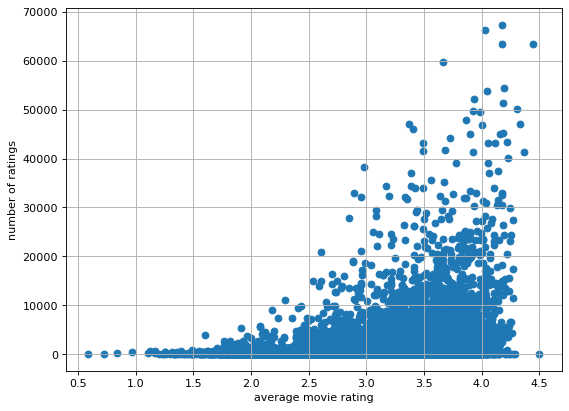

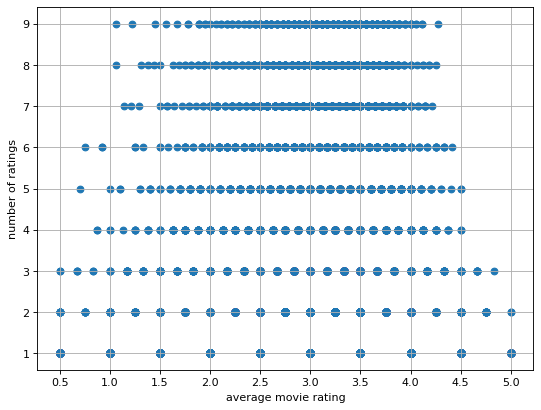

In [13]:
figure(figsize=(8, 6), dpi=80)

plt.grid()
plt.xticks(np.arange(0.5, 5.5, step=0.5))
#plt.legend([])
plt.xlabel('average movie rating')
plt.ylabel('number of ratings')
#plt.ylim(0, 50)
plt.scatter(movies.loc[movies['no_ratings']>=10]['avg_rating'], movies.loc[movies['no_ratings']>=10]['no_ratings'])
plt.show()
figure(figsize=(8, 6), dpi=80)

plt.grid()
plt.xticks(np.arange(0.5, 5.5, step=0.5))
#plt.legend([])
plt.xlabel('average movie rating')
plt.ylabel('number of ratings')
plt.scatter(movies.loc[movies['no_ratings']<10]['avg_rating'], movies.loc[movies['no_ratings']<10]['no_ratings'])

# NUMBER OF RATED MOVIES -- AVERAGE RATING

In [14]:
ratings_nomovie=ratings.drop(['movieId', 'timestamp'], axis=1)

df=ratings_nomovie.groupby("userId").agg({"rating": np.mean, "userId": np.size})
df=pd.DataFrame(np.hstack([np.asarray(df.index).reshape(-1,1), np.asarray(df)]), columns=['mid', 'avg_rating', 'no_ratings'])
df=df.astype({'mid': 'int32'})
df

,mid,avg_rating,no_ratings
0,1,3.742857,175.0
1,2,4.000000,61.0
2,3,4.122995,187.0
3,4,3.571429,28.0
4,5,4.272727,66.0
...,...,...,...
138488,138489,3.986842,38.0
138489,138490,3.556291,151.0
138490,138491,2.681818,22.0
138491,138492,4.097561,82.0


In [15]:
ratings.rating.mean()

3.5255285642993797

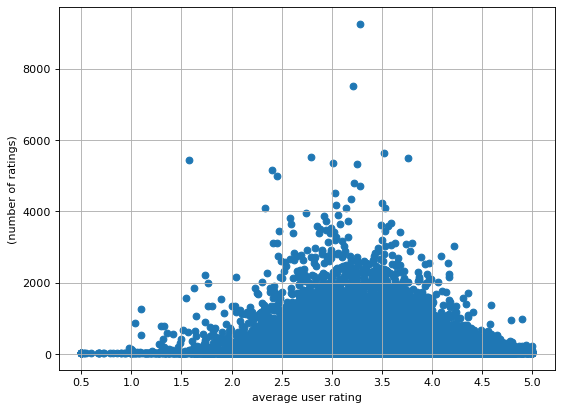

In [16]:
figure(figsize=(8, 6), dpi=80)

plt.grid()
plt.xticks(np.arange(0.5, 5.5, step=0.5))
#plt.legend([])
plt.xlabel('average user rating')
plt.ylabel('(number of ratings)')
#plt.ylim(0, 50)
plt.scatter(df.loc[df['no_ratings']>=10]['avg_rating'], (df.loc[df['no_ratings']>=10]['no_ratings']))
plt.show()


# TAGS SET -- RATING GIVEN

In [17]:
ratings[['userId', 'movieId', 'rating']].head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [18]:
tags_notime=tags.drop(['timestamp'], axis=1)

df=tags_notime.groupby(["userId", 'movieId']).size().reset_index()
df.rename(columns={0: "tags_set"}, inplace=True)

df=df.merge(ratings[['userId', 'movieId', 'rating']],  on=['userId', 'movieId'])
df
#df=pd.DataFrame(np.hstack([np.asarray(df.index).reshape(-1,1), np.asarray(df)]), columns=['mid', 'avg_rating', 'no_ratings'])
#df=df.astype({'mid': 'int32'})
#df

,userId,movieId,tags_set,rating
0,65,27866,1,4.0
1,65,48082,2,4.5
2,65,58652,4,5.0
3,96,106696,16,3.5
4,121,778,4,4.0
...,...,...,...,...
126078,138446,3489,3,5.0
126079,138446,7045,2,4.5
126080,138446,7164,2,4.0
126081,138446,55999,4,2.5


In [19]:
df.sort_values(by='tags_set')

,userId,movieId,tags_set,rating
0,65,27866,1,4.0
66151,70201,43828,1,3.5
66150,70201,43679,1,2.0
66149,70201,43558,1,2.5
66146,70201,42943,1,3.0
...,...,...,...,...
55582,58612,81591,45,3.0
55577,58612,78574,45,4.0
55557,58612,63082,45,4.0
55449,58612,34405,47,4.0


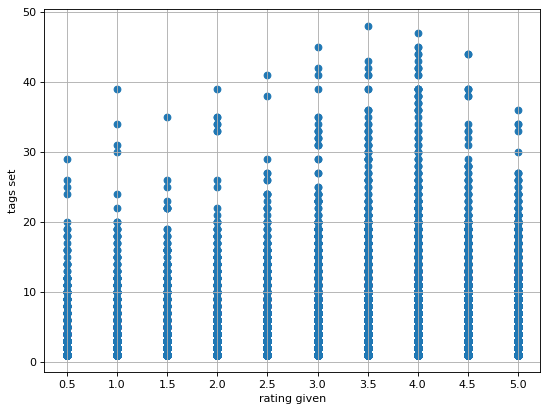

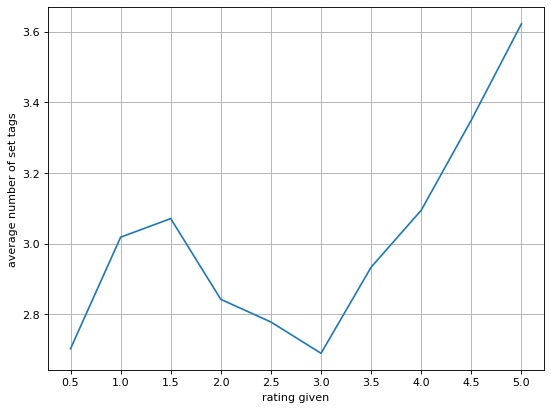

In [20]:
figure(figsize=(8, 6), dpi=80)

plt.grid()
plt.xticks(np.arange(0.5, 5.5, step=0.5))
#plt.legend([])
plt.xlabel('rating given')
plt.ylabel('tags set')
#plt.ylim(0, 50)
plt.scatter( df['rating'], df['tags_set'],)
plt.show()
figure(figsize=(8, 6), dpi=80)

plt.grid()
plt.xticks(np.arange(0.5, 5.5, step=0.5))
#plt.legend([])
plt.xlabel('rating given')
plt.ylabel('average number of set tags')
#plt.ylim(0, 50)
plt.plot(np.arange(0.5, 5.5, step=0.5), df.drop(columns=['movieId', 'userId']).groupby('rating').agg({'tags_set': np.mean}))
plt.show()

In [21]:
movies

,movieId,title,genres,avg_rating,no_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,49695.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,22243.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,12735.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,2756.0
4,5,Father of the Bride Part II (1995),Comedy,3.064592,12161.0
...,...,...,...,...,...
26739,131254,Kein Bund für's Leben (2007),Comedy,4.000000,1.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.000000,1.0
26741,131258,The Pirates (2014),Adventure,2.500000,1.0
26742,131260,Rentun Ruusu (2001),(no genres listed),3.000000,1.0


In [22]:
pd.concat([movies.drop('genres', axis=1), movies.genres.str.get_dummies(sep='|')], axis=1)  

,movieId,title,avg_rating,no_ratings,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),3.921240,49695.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),3.211977,22243.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),3.151040,12735.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),2.861393,2756.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),3.064592,12161.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26739,131254,Kein Bund für's Leben (2007),4.000000,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26740,131256,"Feuer, Eis & Dosenbier (2002)",4.000000,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26741,131258,The Pirates (2014),2.500000,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26742,131260,Rentun Ruusu (2001),3.000000,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# tags set for a movie 

In [23]:
tags_nouser=tags.drop(['userId', 'timestamp'], axis=1)

df=tags_nouser.groupby(['movieId',]).size().reset_index()
df.rename(columns={0: "tags_set"}, inplace=True)

df


,movieId,tags_set
0,1,436
1,2,123
2,3,18
3,4,6
4,5,22
...,...,...
19540,131054,1
19541,131082,2
19542,131164,1
19543,131170,1


In [24]:
movies=movies.merge(df, how='inner', on='movieId' )
movies

,movieId,title,genres,avg_rating,no_ratings,tags_set
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,49695.0,436
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,22243.0,123
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,12735.0,18
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,2756.0,6
4,5,Father of the Bride Part II (1995),Comedy,3.064592,12161.0,22
...,...,...,...,...,...,...
19006,131054,Dinotopia: Quest for the Ruby Sunstone (2005),Children|Fantasy|Sci-Fi,2.000000,1.0,1
19007,131082,Playground (2009),(no genres listed),4.500000,1.0,2
19008,131164,Vietnam in HD (2011),War,4.000000,1.0,1
19009,131170,Parallels (2015),Sci-Fi,3.500000,1.0,1


In [25]:
movies.head()

,movieId,title,genres,avg_rating,no_ratings,tags_set
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,49695.0,436
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,22243.0,123
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,12735.0,18
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,2756.0,6
4,5,Father of the Bride Part II (1995),Comedy,3.064592,12161.0,22


In [26]:
tags_notime.groupby(['movieId', "userId",]).size().reset_index()

,movieId,userId,0
0,1,1644,1
1,1,1741,4
2,1,2299,1
3,1,3596,3
4,1,6233,2
...,...,...,...
174839,131054,88144,1
174840,131082,92885,2
174841,131164,54560,1
174842,131170,88738,1


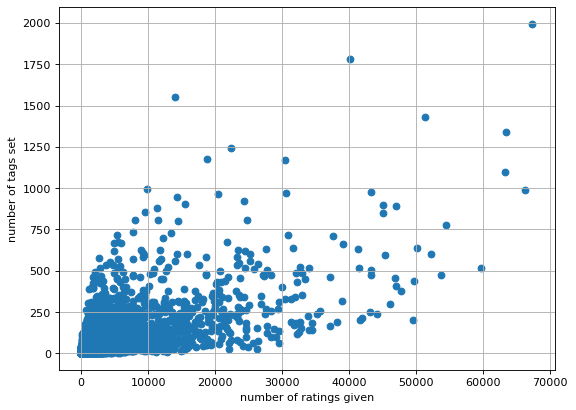

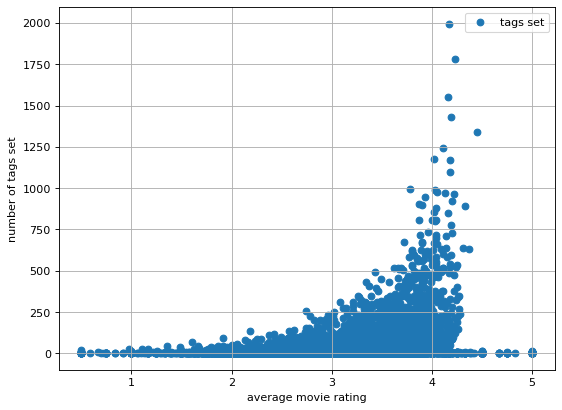

In [27]:
figure(figsize=(8, 6), dpi=80)

plt.grid()
#plt.xticks(np.arange(0.5, 5.5, step=0.5))
#plt.legend([])
plt.xlabel('number of ratings given')
plt.ylabel('number of tags set')
#plt.ylim(0, 50)
plt.scatter( movies['no_ratings'], movies['tags_set'],)
plt.show()


figure(figsize=(8, 6), dpi=80)

plt.grid()
#plt.xticks(np.arange(0.5, 5.5, step=0.5))
plt.xlabel('average movie rating')
plt.ylabel('number of tags set')
#plt.ylim(0, 50)
plt.scatter( movies['avg_rating'], movies['tags_set'],)
#plt.scatter( movies['avg_rating'], movies['no_ratings'],)
plt.legend(['tags set', 'no of ratings'])

plt.show()

# YEAR -- POPULARITY (RATINGS GIVEN), AVG RATING

In [28]:
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.year = pd.to_datetime(movies.year, format='%Y')
movies.year = movies.year.dt.year # As there are some NaN years, resulting type will be float (decimals)
movies.title = movies.title.str[:-7]
movies.head()

,movieId,title,genres,avg_rating,no_ratings,tags_set,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,3.921240,49695.0,436,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,3.211977,22243.0,123,1995.0
2,3,Grumpier Old Men,Comedy|Romance,3.151040,12735.0,18,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,2.861393,2756.0,6,1995.0
4,5,Father of the Bride Part II,Comedy,3.064592,12161.0,22,1995.0


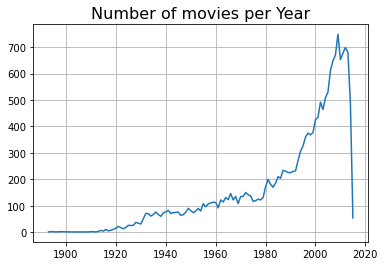

In [29]:
plt.plot(movies.groupby(['year']).count()['title'])
plt.title('Number of movies per Year',fontsize=16)
plt.grid(True)


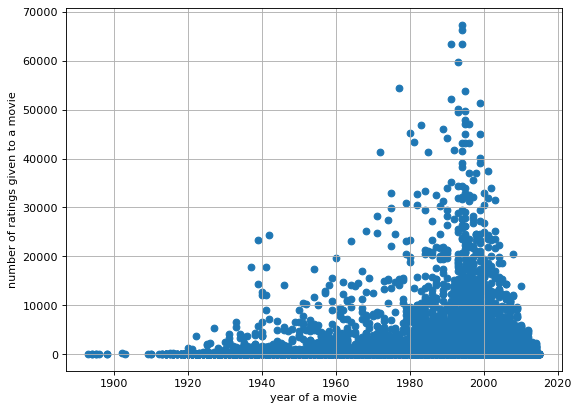

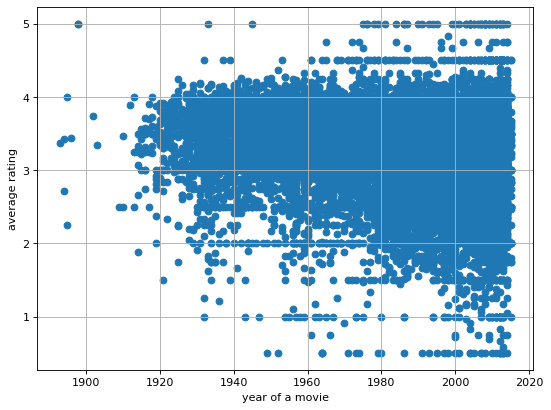

In [30]:
figure(figsize=(8, 6), dpi=80)

plt.grid()
#plt.xticks(np.arange(0.5, 5.5, step=0.5))
plt.xlabel('year of a movie')
plt.ylabel('number of ratings given to a movie')
#plt.ylim(0, 50)
plt.scatter( movies['year'], movies['no_ratings'],)
#plt.scatter( movies['avg_rating'], movies['no_ratings'],)
#plt.legend(['tags set', 'no of ratings'])

plt.show()

figure(figsize=(8, 6), dpi=80)

plt.grid()
#plt.xticks(np.arange(0.5, 5.5, step=0.5))
plt.xlabel('year of a movie')
plt.ylabel('average rating')
#plt.xlim(1915, 2017)
plt.scatter( movies['year'], movies['avg_rating'],)
#plt.scatter( movies['avg_rating'], movies['no_ratings'],)
#plt.legend(['tags set', 'no of ratings'])

plt.show()

In [31]:
df=movies[['year', 'avg_rating', 'no_ratings']].groupby(['year']).agg({'avg_rating': np.average, 'no_ratings': np.mean}).reset_index()

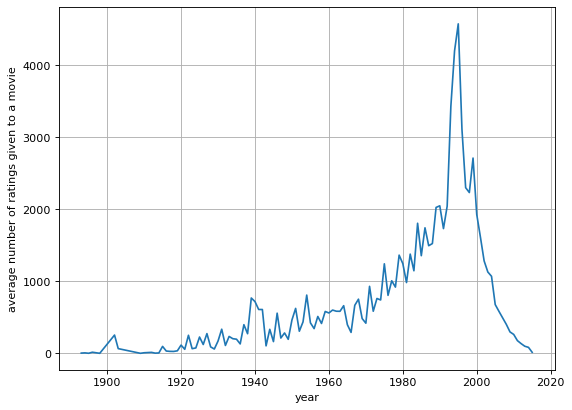

In [32]:
figure(figsize=(8, 6), dpi=80)

plt.grid()
#plt.xticks(np.arange(0.5, 5.5, step=0.5))
plt.xlabel('year')
plt.ylabel('average number of ratings given to a movie')
#plt.ylim(0, 50)
plt.plot( df['year'], df['no_ratings'],)
#plt.scatter( movies['avg_rating'], movies['no_ratings'],)
#plt.legend(['tags set', 'no of ratings'])

plt.show()


In [33]:
movies.loc[movies['year']==1895]

,movieId,title,genres,avg_rating,no_ratings,tags_set,year
17879,113048,Tables Turned on the Gardener,Comedy,2.25,2.0,4,1895.0
18647,120869,Employees Leaving the Lumière Factory,Documentary,4.00,1.0,1,1895.0


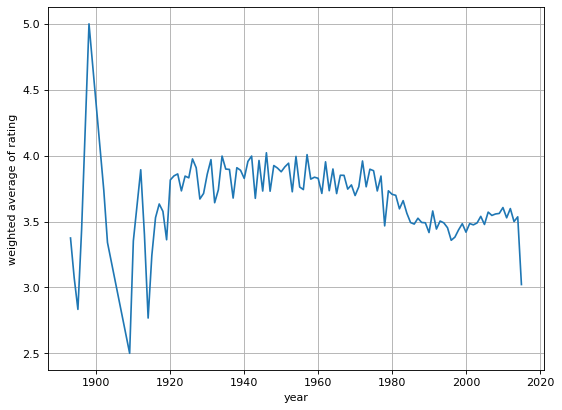

In [34]:
grouped=movies.groupby('year')
g_wavg= lambda x: np.average(x.avg_rating, weights=x.no_ratings)
df=grouped.apply(g_wavg).reset_index()
df.rename(columns={0: "weighted_avg"}, inplace=True)

figure(figsize=(8, 6), dpi=80)

plt.grid()
#plt.xticks(np.arange(0.5, 5.5, step=0.5))
plt.xlabel('year')
plt.ylabel('weighted average of rating')
#plt.ylim(0, 50)
plt.plot( df['year'], df['weighted_avg'],)
#plt.scatter( movies['avg_rating'], movies['no_ratings'],)
#plt.legend(['tags set', 'no of ratings'])

plt.show()

In [35]:
movies[['year', 'avg_rating', 'no_ratings']].groupby(['year']).agg({'avg_rating': np.average, 'no_ratings': np.mean}).reset_index()

,year,avg_rating,no_ratings
0,1893.0,3.375000,4.000000
1,1894.0,3.071429,7.000000
2,1895.0,3.125000,1.500000
3,1896.0,3.437500,16.000000
4,1898.0,5.000000,1.000000
...,...,...,...
108,2011.0,3.254050,177.041359
109,2012.0,3.224658,135.602289
110,2013.0,3.257198,99.105882
111,2014.0,3.237877,83.402464


In [36]:
np.linspace(1893,2015, 2)

array([1893., 2015.])

# WIĘCŁAW

In [38]:
users = ratings.userId.unique()
avgRate = np.array(ratings.groupby(["userId"])["rating"].mean())

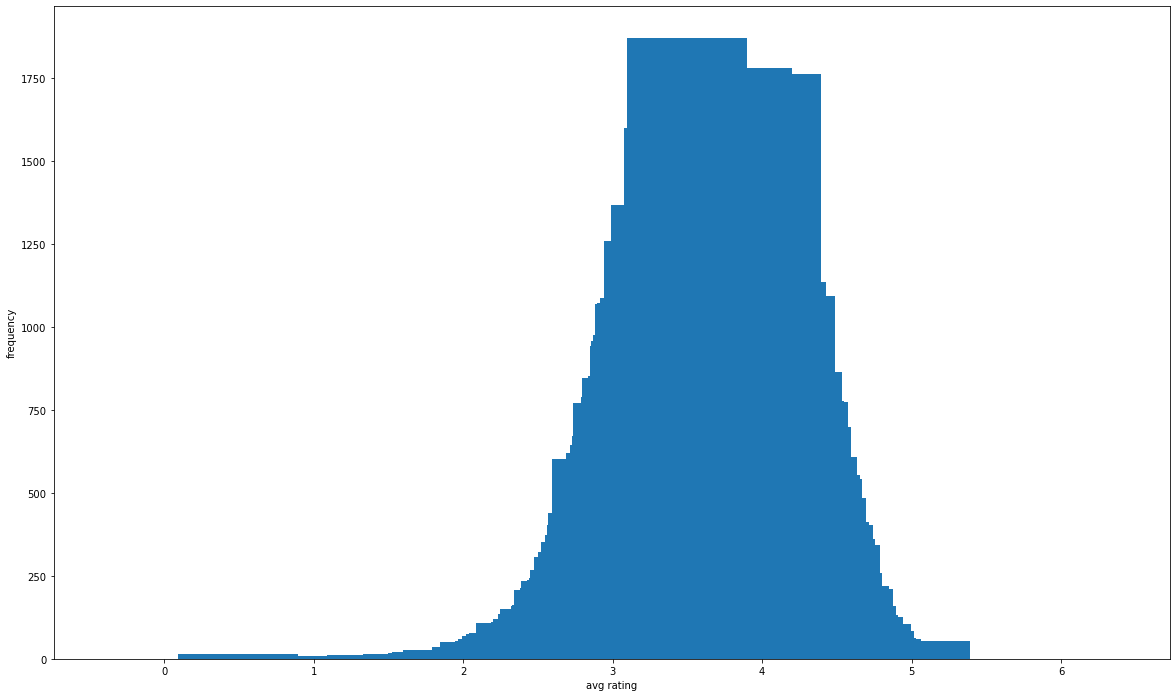

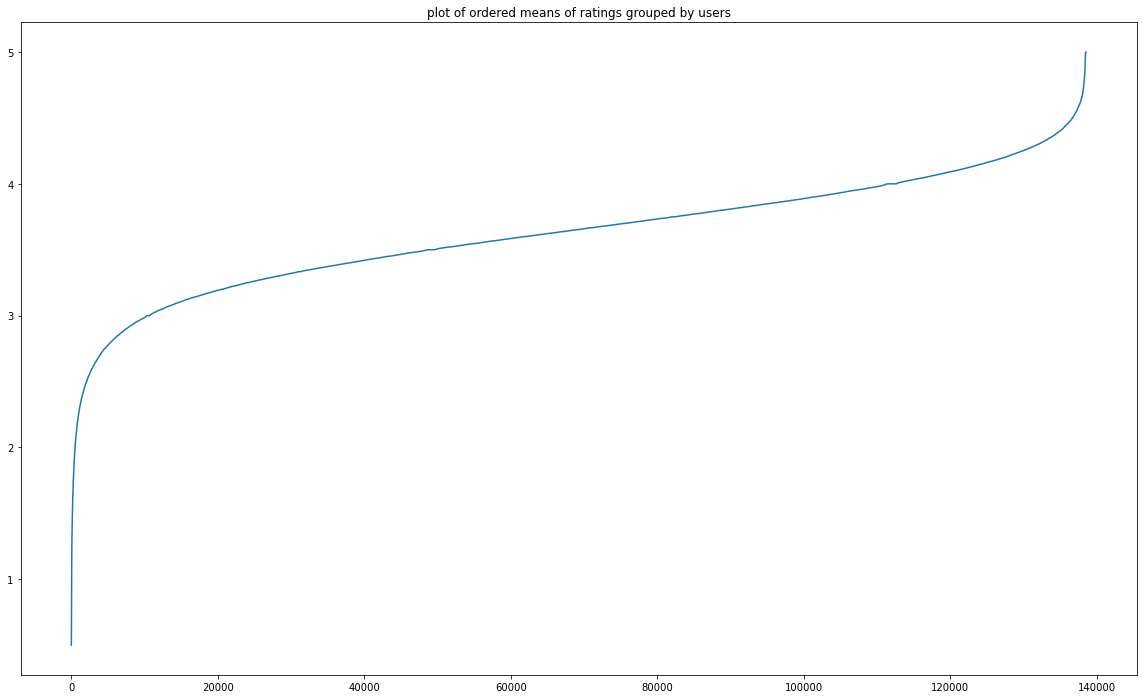

In [39]:
number = 500
arr = np.zeros(number-1)
np
linspace = np.linspace(0,6, number)
for i in range(1,number):
    arr[i-1] = np.sum(np.logical_and(avgRate > linspace[i-1], avgRate < linspace[i]))
plt.figure(figsize=(20,12))
plt.ylabel('frequency')
plt.xlabel('avg rating')
plt.bar(linspace[:-1], arr)
plt.show()
plt.figure(figsize=(20,12))
plt.title("plot of ordered means of ratings grouped by users")
plt.plot(np.array(avgRate)[np.argsort(np.array(avgRate))])
plt.show()

In [40]:
avgMovieRate = ratings.groupby(["movieId"])["rating"].mean()
moveRatingDf = pd.DataFrame(avgMovieRate).join(movies["title"], on="movieId").sort_values(by="rating", ascending = False).dropna()
moveRatingDf = moveRatingDf.join(
    pd.DataFrame(ratings.groupby(["movieId"])["rating"].count()).rename(columns={"rating":"ratingNumber"}),
    on = "movieId")

moveRatingDf

,rating,title,ratingNumber
movieId,,,
3226,4.666667,"Brain That Wouldn't Die, The",3
318,4.446990,"Wonderful, Horrible Life of Leni Riefenstahl, ...",63366
858,4.364732,Trees Lounge,41355
50,4.334372,Mighty Aphrodite,47006
7568,4.333333,Evil Roy Slade,3
...,...,...,...
6189,1.000000,The Butterfly Effect,2
6483,0.973005,"Bon Voyage, Charlie Brown (and Don't Come Back!)",426
8859,0.837321,Blackout (Contraband),209


Text(0.5, 1.0, 'dependance between rating and number of ratings')

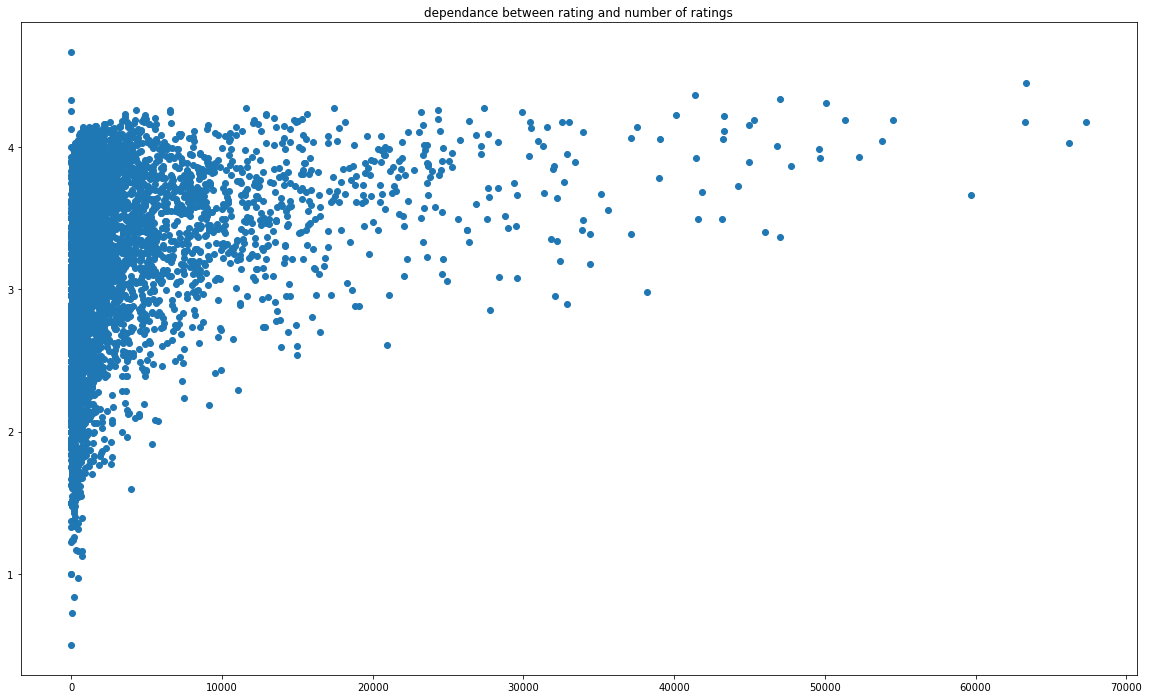

In [41]:
plt.figure(figsize=(20,12))
minRating = 0
minNumber = 0
fitlered = (moveRatingDf.rating > minRating) & (moveRatingDf.ratingNumber > minNumber)
plt.scatter((moveRatingDf.ratingNumber[fitlered]), 
            moveRatingDf.rating[fitlered])
plt.title("dependance between rating and number of ratings")

In [42]:
userNumberOfRatings = pd.DataFrame(ratings.groupby("userId")["rating"].count()).rename(columns={"rating":"numberOfRatings"})


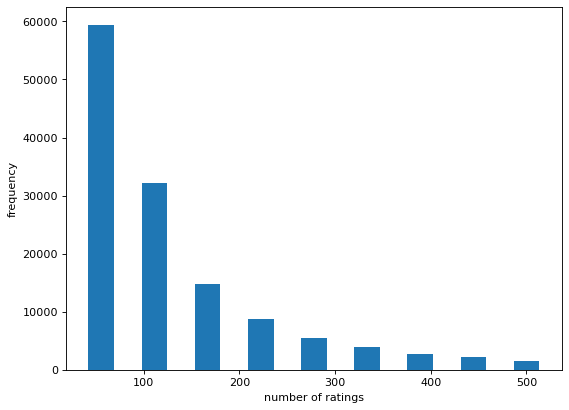

In [44]:
number = 10
arr = np.zeros(number-1)
tmp = np.array(userNumberOfRatings.numberOfRatings)

linspace = np.linspace(0,500, number)
for i in range(1,number):
    arr[i-1] = np.sum(np.logical_and(tmp > linspace[i-1], tmp < linspace[i]))
figure(figsize=(8, 6), dpi=80)
plt.ylabel('frequency')
plt.xlabel('number of ratings')
plt.bar(linspace[1:], arr, width=26.8)
plt.show()

In [45]:
#genre sympathy analisys
#dla kadego uzytkownika 0.5 najlepszych i najgorszych gatunkow
df = ratings.join(movies.genres, on="movieId").dropna()
df = df.join(pd.DataFrame(ratings.groupby(["userId"])["rating"].mean()).rename(columns = {"rating":"avg"}), on="userId")

liked = df[df.rating>df.avg+.5].groupby("userId")
liked = liked.agg(lambda x: "|".join(x)).rename(columns={"genres":"liked genres"})

disliked = df[df.rating<df.avg-.5].groupby("userId")
disliked = disliked.agg(lambda x: "|".join(x)).rename(columns={"genres":"disliked genres"})

In [46]:
xd = liked.join(disliked, on="userId")
xd

,liked genres,disliked genres
userId,,
1,Comedy|Drama|Fantasy|Romance|Drama|Romance|Act...,Drama|Comedy|Comedy|Action|Adventure|Action|Th...
2,Comedy|Drama|War|Drama|Drama|Drama|Drama|Thril...,Drama|Horror|Sci-Fi|Drama|Romance|Crime|Myster...
3,Comedy|Drama|Romance|Action|Crime|Drama|Myster...,Drama|Romance|Action|Children|Horror|Sci-Fi|Dr...
4,Action|Crime|Drama|Sci-Fi|Thriller|Drama|Romance,Comedy|Romance|Action|Comedy|Crime|Drama|Thril...
5,Comedy|Horror|Comedy|Documentary|Comedy|Drama|...,Comedy|Romance|Comedy|Comedy|Crime|Comedy|Dram...
...,...,...
138489,Comedy|Drama|Romance|Documentary|Adventure|Dra...,Crime|Drama|Comedy|Sci-Fi|Comedy
138490,Adventure|Romance|IMAX|Drama|Romance|Drama|Dra...,Crime|Drama|Horror|Mystery|Thriller|Action|Cri...
138491,Horror|Mystery|Drama|Fantasy|Horror|Action|Adv...,Adventure|Children|Fantasy|Comedy|Musical|Roma...


In [47]:
def xx(x):
    tmp = np.unique(str(x).split("|"))
    tmp = np.sort(tmp)
    tmp = str(tmp)
    tmp = tmp.replace(" ","|").replace("[","").replace("]", "").replace("'","")
    return tmp

In [48]:
xd["liked genres"] = xd["liked genres"].map(xx)
xd["disliked genres"] = xd["disliked genres"].map(xx)
xd

,liked genres,disliked genres
userId,,
1,Action|Comedy|Crime|Drama|Fantasy|Musical|Roma...,Action|Adventure|Animation|Children|Comedy|Doc...
2,Action|Adventure|Animation|Children|Comedy|Cri...,Action|Adventure|Animation|Children|Comedy|Cri...
3,Action|Adventure|Animation|Children|Comedy|Cri...,Action|Adventure|Children|Comedy|Crime|Drama|F...
4,Action|Crime|Drama|Romance|Sci-Fi|Thriller,Action|Adventure|Animation|Children|Comedy|Cri...
5,Action|Adventure|Animation|Children|Comedy|Cri...,Action|Comedy|Crime|Drama|Horror|Romance|Sci-F...
...,...,...
138489,Action|Adventure|Children|Comedy|Documentary|D...,Comedy|Crime|Drama|Sci-Fi
138490,Action|Adventure|Animation|Children|Comedy|Cri...,Action|Adventure|Animation|Children|Comedy|Cri...
138491,Action|Adventure|Comedy|Crime|Drama|Fantasy|Ho...,Action|Adventure|Children|Comedy|Drama|Fantasy...


In [49]:
for i in trange(len(xd)):
    liked = np.array(str(xd.iloc[i]["liked genres"]).split("|"))
    disliked = np.array(str(xd.iloc[i]["disliked genres"]).split("|"))
    
    liked = np.setdiff1d(liked, disliked)
    disliked = np.setdiff1d(disliked, liked)
    
    
    
    xd.iloc[i, xd.columns.get_loc('liked genres')] =str(liked).replace(" ","|").replace("[","").replace("]", "").replace("'","")
    xd.iloc[i, xd.columns.get_loc('disliked genres')] =str(disliked).replace(" ","|").replace("[","").replace("]", "").replace("'","")
    

xd.iloc[0]

NameError: name 'trange' is not defined

In [ ]:
xd